### Οπτικοποίηση δεδομένων

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
TAG_VALS_CAT = {
    1: "case",
    0: "control",
}

TAG_VALS_NUM = {
    "case": 1,
    "control": 0,
}

In [3]:
df = pd.read_csv("./data/uci_heart_failure/uci_hf_df.csv")
df["tag"] = df["tag"].replace(TAG_VALS_CAT)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,tag
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,control
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,case
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,case
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,control
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,case
293,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,case
294,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,case
295,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,case


### Έλεγχος για ισορροπία κλάσεων

* Είναι πολύ σημαντικό οι κλάσεις που έχουμε σε ένα dataset να είναι ισορροπημένες

* Η απουσία ισορροπίας μπορεί να οδηγήσει σε πολλά προβλήματα (π.χ: overfitting, λανθασμένα/biased αποτελέσματα, κλπ).

* Μέσω bar plots μπορούμε να δούμε αν οι κλάσεις στο dataset μας είναι ισορροπημένες.

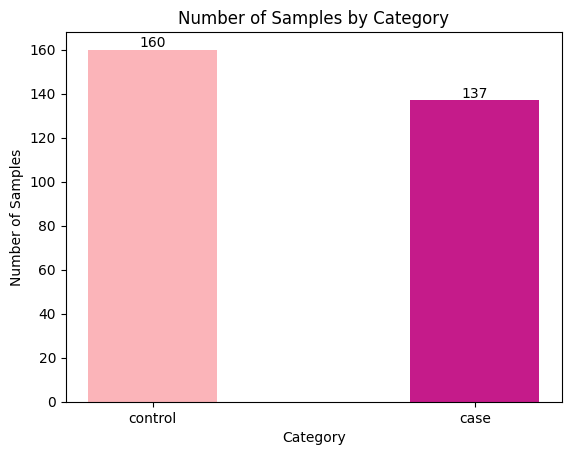

In [4]:
# Assuming 'df' is your DataFrame and the last column is 'category'
# You previously counted the occurrences of each category and reordered them
category_counts = df['tag'].value_counts().reindex(['control', 'case'])

# Define the colors for each category
colors = ['#fbb4b9', '#c51b8a']  # Colors for 'control' and 'case', respectively

# Creating the bar plot with specified bar width and colors
bar_width = 0.4  # Make the bars thinner by setting width < 0.8 (default is 0.8)
plt.bar(category_counts.index, category_counts.values, width=bar_width, color=colors)

# Adding the title
plt.title('Number of Samples by Category')

# Labeling the axes
plt.xlabel('Category')
plt.ylabel('Number of Samples')

# Optional: Add text labels on top of the bars
for i, count in enumerate(category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

### Data standardization

* Σε πολλές περιπτώσεις οι κλιμακες τιμών των χαρακτηριστικών που έχουμε στο dataset είναι πολύ διαφορετικές.

* Σε τέτοιες περιπτώσεις μπορούμε να κάνουμε scaling στα δεδομένα είτε με normalization είτε με standardization (το οποίο είναι καλύτερο σε περιπτώσεις όπου έχουμε ακραίες παρατηρήσεις).

In [ ]:
# Assuming 'df' is your DataFrame and 'tag' is the name of the column with categorical data
# Store the 'tag' column in its own DataFrame
tag_df = df[['tag']].copy()

# Drop the 'tag' column from the main DataFrame
df_numerical = df.drop('tag', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform scaling on the numerical data
df_scaled_numerical = pd.DataFrame(
    scaler.fit_transform(df_numerical),
    columns=df_numerical.columns,
    index=df_numerical.index  # This preserves the original indexing
)

# Concatenate the scaled numerical data with the 'tag' column
df_scaled = pd.concat([df_scaled_numerical, tag_df], axis=1)


# Assuming df is your pre-existing DataFrame and melted_df is created as shown
melted_df = pd.melt(df_scaled, id_vars="tag", value_vars=[col for col in df_scaled.columns if col != "condition"],
                    var_name="feature", value_name="value")

### Violin plot

In [5]:
# Assuming df is your pre-existing DataFrame and melted_df is created as shown
melted_df = pd.melt(df, id_vars="tag", value_vars=[col for col in df.columns if col != "condition"],
                    var_name="feature", value_name="value")

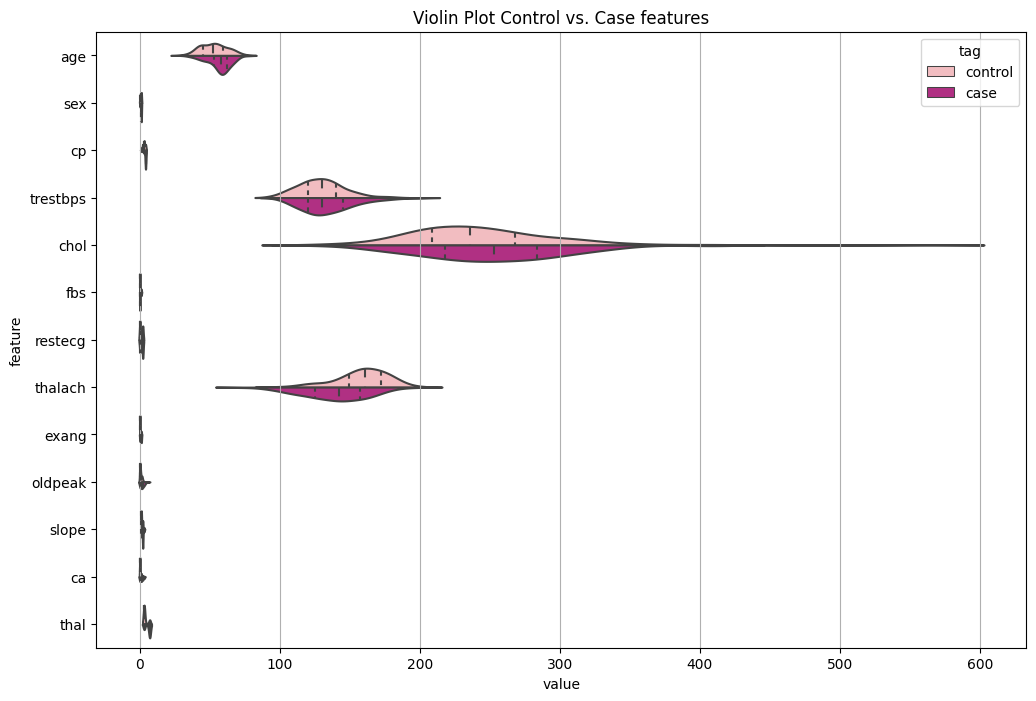

In [6]:
fig, ax = plt.subplots(figsize =(12, 8))  
plot_palette = {'control':'#fbb4b9','case':'#c51b8a'}
sns.violinplot(data=melted_df, 
                  x='value',
                  y='feature',
                  hue='tag', 
                  split=True,
                  inner='quartile', 
                  palette=plot_palette,
                  density_norm="count",
                  )
plt.xticks(rotation=0)
plt.title("Violin Plot Control vs. Case features")
plt.grid(axis='x')
# plt.savefig("./figures/violin_plot.pdf", bbox_inches="tight")

### Correlation heatmap

<Axes: >

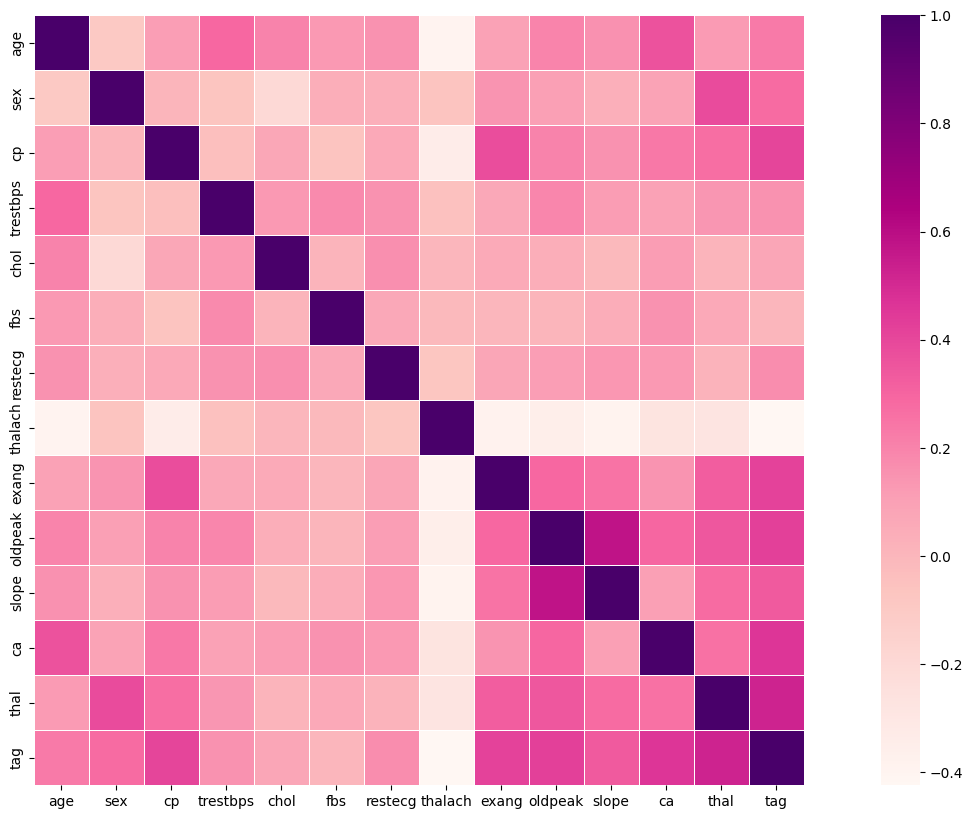

In [7]:
df["tag"] = df["tag"].replace(TAG_VALS_NUM)
# Compute pairwise correlation of columns, 
# excluding NA/null values.
corr_matrix = df.corr(method='pearson')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,10))

# Draw the heatmap with the mask 
# and correct aspect ratio
sns.heatmap(data=corr_matrix,
            cmap='RdPu', annot=False, 
            square=True, 
            linewidths=.5, fmt=".1f")
# plt.savefig("./figures/corr_heatmap_v2.pdf", bbox_inches="tight")